# First order PI

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

sym.init_printing()

In [2]:
z, Wn, Kg, Kp, tau, Ti = sym.symbols('zeta omega_n K_G K_p tau T_i')

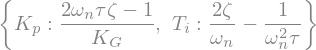

In [3]:
eq1 = sym.Eq(2*z*Wn, (1+Kg*Kp)/tau);
eq2 = sym.Eq(Wn**2 , (Kg*Kp)/(tau*Ti));
sym.solve((eq1, eq2),(Kp,Ti))

## Example

In [4]:
import control as ct
from control.matlab import *
import numpy as np

Process: 

    1
---------
s + 0.375

Step response:


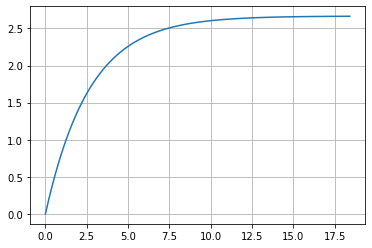

Step info: 


{'RiseTime': 5.954159432388643,
 'SettlingTime': 10.60584648894227,
 'SettlingMin': 2.4179724408311363,
 'SettlingMax': 2.663999999999991,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 2.663999999999991,
 'PeakTime': 18.420680743952364,
 'SteadyStateValue': 2.6666666666666665}

In [5]:
# System
num = [1]
den = [1, 0.375]
G = ct.tf(num,den)
print('Process: ')
print(G)

t, out = ct.step_response(G) 
print('Step response:')
plt.plot(t, out)
plt.grid()
plt.show()

print('Step info: ')
stepinfo(G)

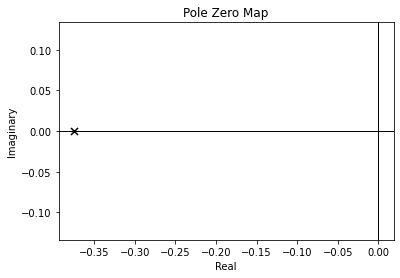

In [6]:
# Root locust
ct.pzmap(G);

In [7]:
# Data
ts = 8
Mp = 15

In [8]:
# Requirements
z = np.sqrt(np.square(np.log(Mp/100))/(np.pi**2 + np.square(np.log(Mp/100)))) 
Wn = 4/(z*ts)
tau = 1/den[1]
Kg = num[0]/den[1]

print('z= ', z)
print('Wn= ', Wn)

z=  0.5169308662051555
Wn=  0.9672473297455677


In [9]:
# Desired characteristic equation and poles
print('delta = s² + {a}s + {b:1.4f}'.format(a=2*z*Wn,b=Wn**2))
print('s = {a} + j{b:1.4}'.format(a=-z*Wn, b=Wn*np.sqrt(1-z**2)))

delta = s² + 1.0s + 0.9356
s = -0.5 + j0.828


In [10]:
# PI controller
Kp = (2*z*Wn*tau-1)/Kg
Ti = (Kp*Kg)/(tau*Wn**2)

Gc = ct.tf([Kp*Ti, Kp],[Ti, 0])
print(Gc)


0.4175 s + 0.625
----------------
    0.668 s



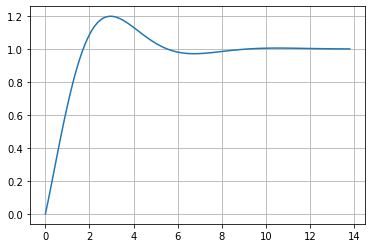

Step info: 


{'RiseTime': 1.2559555052694795,
 'SettlingTime': 7.814834255010095,
 'SettlingMin': 0.9298750106558097,
 'SettlingMax': 1.197286847173987,
 'Overshoot': 19.728684717398703,
 'Undershoot': 0,
 'Peak': 1.197286847173987,
 'PeakTime': 2.9305628456287858,
 'SteadyStateValue': 1.0}

In [11]:
# PI response
sys = ct.feedback(Gc*G)
t, out = ct.step_response(sys)
plt.plot(t,out)
plt.grid()
plt.show()

print('Step info: ')
stepinfo(sys)

Poles:  [-0.5+0.82798997j -0.5-0.82798997j]


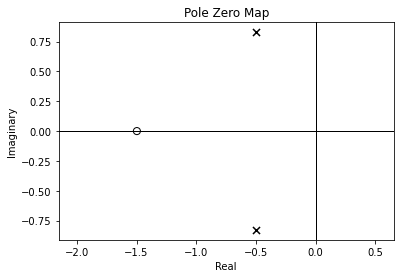

In [12]:
ct.pzmap(sys);
print('Poles: ',ct.pole(sys))